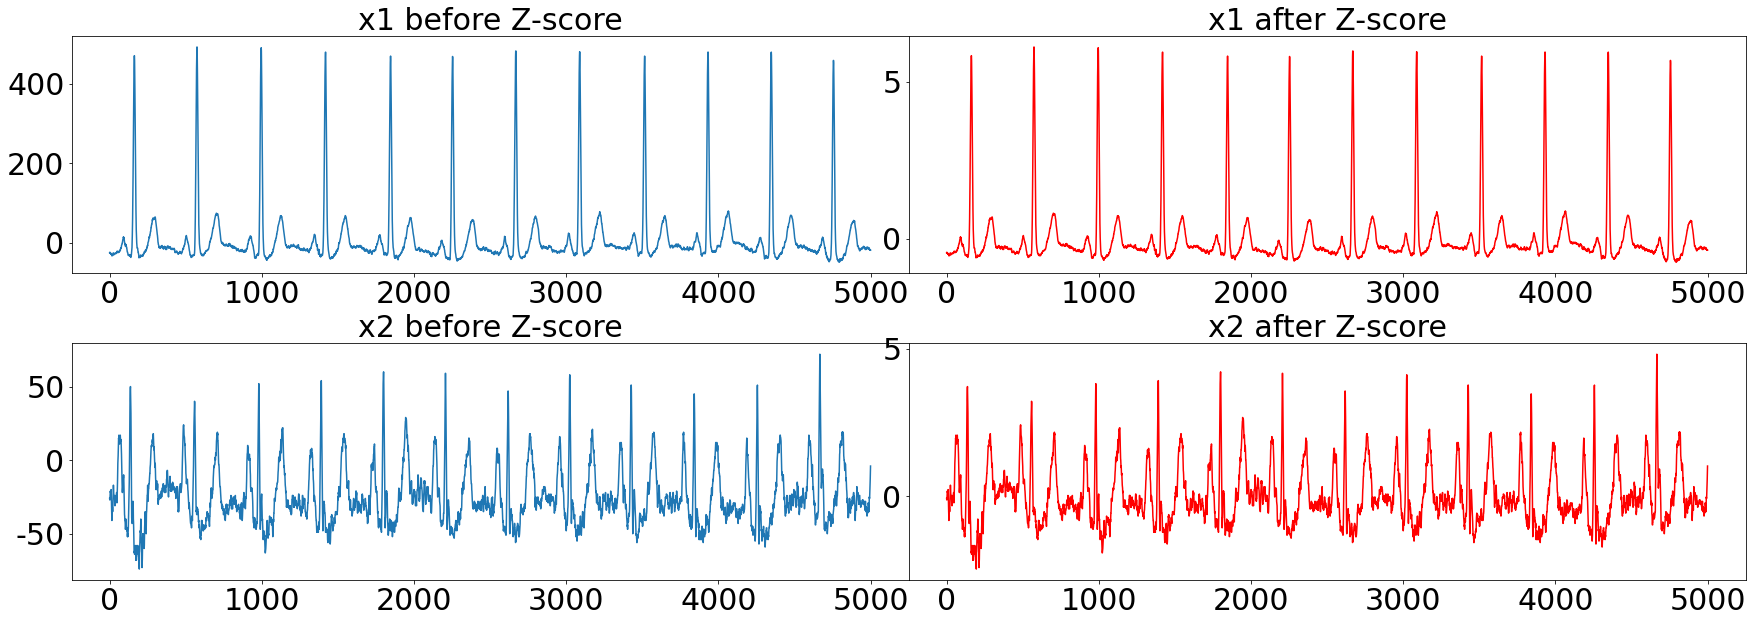

In [25]:
# Z-score
from config import config
import numpy as np
import os
import data_process
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

a = np.load(os.path.join(config.data_dir,'200324000010.xml.npy'))

b = np.load(os.path.join(config.data_dir,'1657599.xml.npy'))

x = a[[1],:]
x = x[0].astype(np.float32)
x_ = (x-np.mean(x))/np.std(x)
z = b[[1],:]
z = z[0].astype(np.float32)
z_ = (z-np.mean(z))/np.std(z)
# a = data_process.resample(a[0],len(a[0]) * 250 // 500)
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0.3)
plt.subplot(2,2,1)
plt.plot(x)
plt.title('x1 before Z-score',fontsize=30)

plt.subplot(2,2,2)
plt.title('x1 after Z-score',fontsize=30)
plt.plot(x_,color='r')
plt.subplot(2,2,3)
plt.plot(z)
plt.title('x2 before Z-score',fontsize=30)
plt.subplot(2,2,4)
plt.title('x2 after Z-score',fontsize=30)
plt.plot(z_,color='r')
plt.savefig('z-score.pdf', dpi=600, format='pdf')


(200, 12)


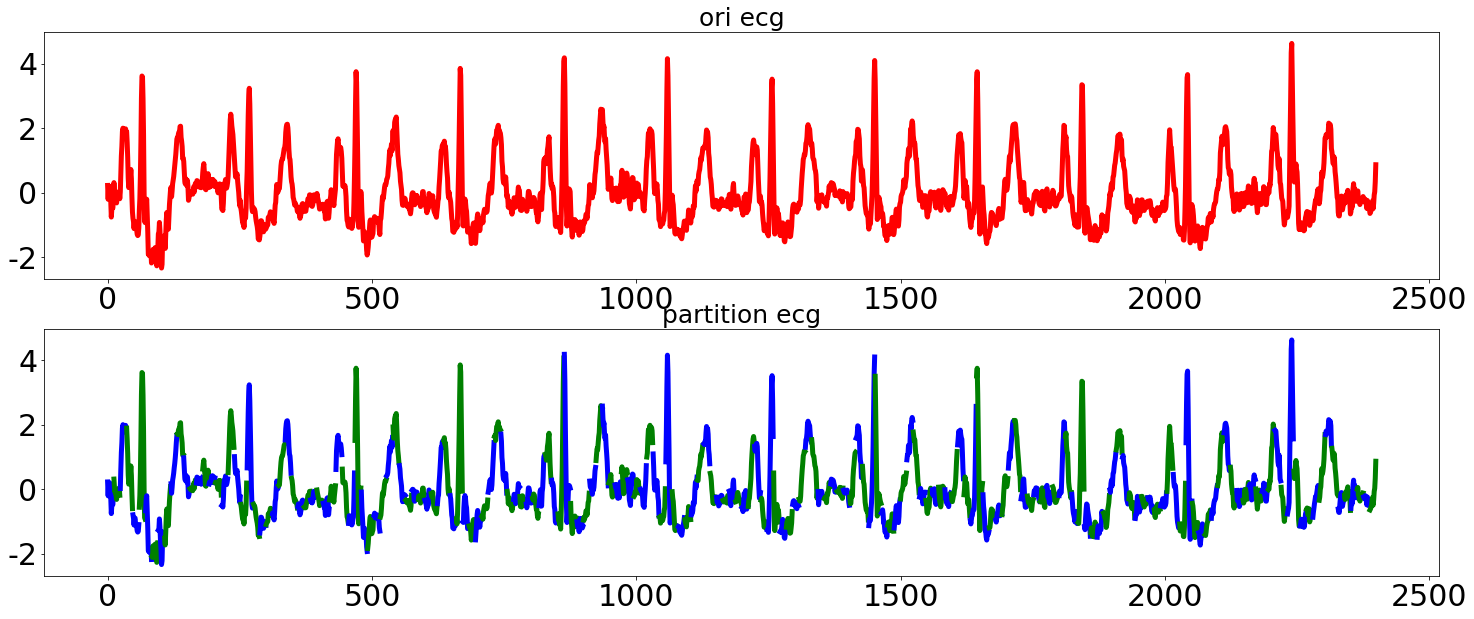

In [62]:
#切分
from config import config
import numpy as np
import os
import data_process
import matplotlib.pyplot as plt
import torch
pl = 12
def patchify(signals):
    l = pl
    n = signals.shape[-1] // l
    x = signals.reshape(shape=(n,l))
    return x
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.rcParams['figure.figsize'] = [25, 10]
a = np.load(os.path.join(config.data_dir,'1657599.xml.npy'))

x = a[[1],:]
x = x[0].astype(np.float32)
x = (x-np.mean(x))/np.std(x)
x = data_process.resample(x,int(240/500*5000))
x = torch.tensor(x,dtype=torch.float32)
px = patchify(x).numpy()
print(px.shape)
color_flag = 0
plt.subplot(2,1,1)
plt.plot(x,linewidth = 5,color ='red')
plt.title('ori ecg',fontsize = 25)
plt.subplot(2,1,2)
for idx,patch in enumerate(px):
    x_axios = range(idx*pl,idx*pl+pl)
    if color_flag%2==0:
        plt.plot(x_axios,patch,linewidth=5,color ='blue')
    else:
        plt.plot(x_axios,patch,linewidth=5,color ='green')
    color_flag+=1

plt.title('partition ecg',fontsize = 25)
plt.savefig('data_patchify.pdf', dpi=600, format='pdf')

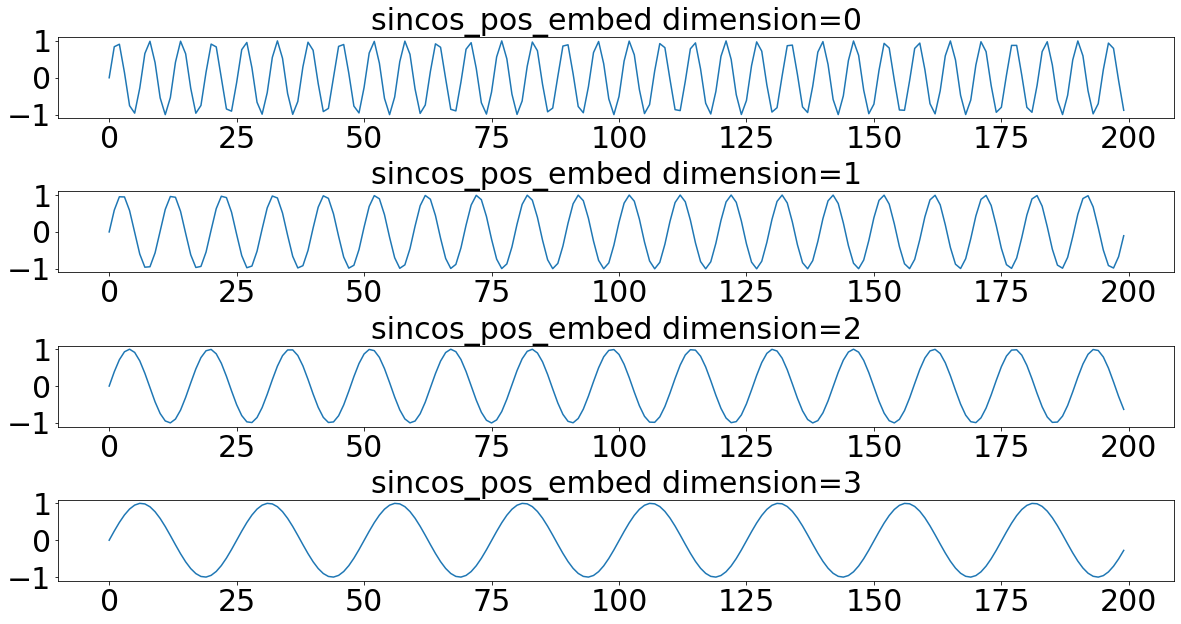

In [14]:
#位置编码
from util.pos_embed import get_1d_sincos_pos_embed
import math
import numpy as np
import matplotlib.pyplot as plt
pos_embed = get_1d_sincos_pos_embed(40, 200, cls_token=False)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
i_0 = pos_embed[:,0]
# for i in pos_embed:
#     print('{:.2f},{:.2f},{:.2f},{:.2f}'.format(i[0],i[1],i[2],i[3]))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0.9)

plt.subplot(4,1,1)
plt.plot(pos_embed[:,0])
plt.title('sincos_pos_embed dimension=0',fontsize='30')
plt.subplot(4,1,2)
plt.plot(pos_embed[:,1])
plt.title('sincos_pos_embed dimension=1',fontsize='30')
plt.subplot(4,1,3)
plt.plot(pos_embed[:,2])
plt.title('sincos_pos_embed dimension=2',fontsize='30')
plt.subplot(4,1,4)
plt.plot(pos_embed[:,3])
plt.title('sincos_pos_embed dimension=3',fontsize='30')
plt.savefig('sincos_pos_embed.pdf', dpi=600, format='pdf')

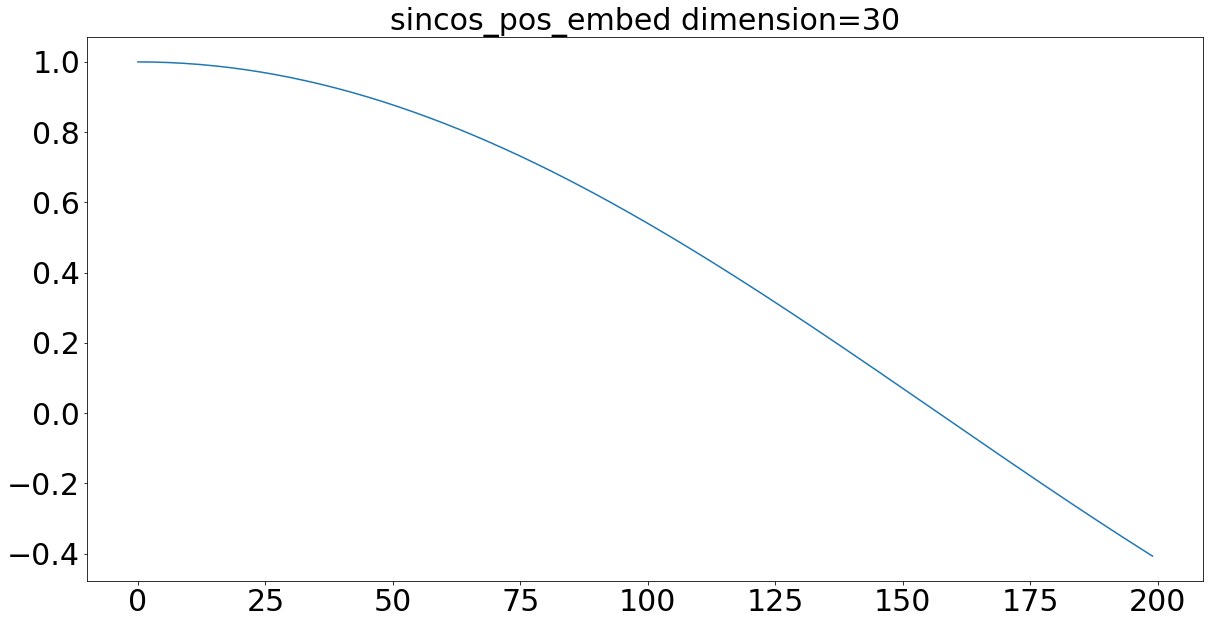

In [16]:
# 位置编码
from util.pos_embed import get_1d_sincos_pos_embed
import math
import numpy as np
import matplotlib.pyplot as plt
pos_embed = get_1d_sincos_pos_embed(40, 200, cls_token=False)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
i_0 = pos_embed[:,0]
# for i in pos_embed:
#     print('{:.2f},{:.2f},{:.2f},{:.2f}'.format(i[0],i[1],i[2],i[3]))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0.9)


plt.plot(pos_embed[:,30])
plt.title('sincos_pos_embed dimension=30',fontsize='30')


plt.savefig('sincos_pos_embed_2.pdf', dpi=600, format='pdf')

/root/miniconda3/envs/ECG/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


input signal :torch.Size([1, 1, 2400])
output signal :torch.Size([1, 1, 2400])


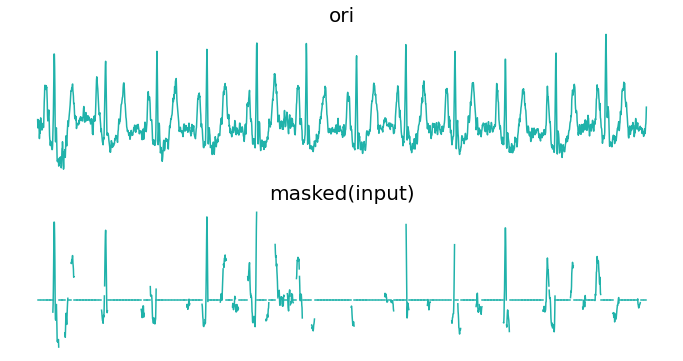

In [70]:
#mean遮盖
#models_mae_1d plot pl40 enc40dec20
import os
import numpy as np
import torch
from models import models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
def show_image(signal, title=''):
    # image is [H, W, 3]
    signal = signal.detach().numpy()
    plt.plot(signal[0],color='lightseagreen')
    plt.title(title, fontsize=20)
    plt.axis('off')
    return
def run_one_signal(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    print('input signal :{}'.format(x.shape))
    # run MAE
    with torch.no_grad():
        loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    print('output signal :{}'.format(y.shape))
    # visualize the mask
    mask = mask.detach()
    
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_length)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping

    # masked image
    im_masked = x * (1 - mask)
    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.subplot(2, 1, 1)
    show_image(x[0],'ori')
    plt.subplot(2, 1, 2)
    signal = im_masked[0].detach().numpy()
    signal = signal[0]
    for i in range(200):
        x_axios = range(i*12,i*12+12)
        plt.plot(x_axios,signal[x_axios],color='lightseagreen')
    plt.title('masked(input)',fontsize=20)
    plt.axis('off')
    # show_image(im_masked[0],'masked(input)')
    # plt.subplot(4, 1, 3)
    # show_image(y[0],'output')
    # plt.subplot(4, 1, 4)
    # show_image(im_paste[0],'reconstruction')
    # plt.subplot(1, 4, 2)
    # show_image(im_masked[0], "masked")

    # plt.subplot(1, 4, 3)
    # show_image(y[0], "reconstruction")

    # plt.subplot(1, 4, 4)
    # show_image(im_paste[0], "reconstruction + visible")

    # plt.show()
device = 'cpu'
model_1D = models_mae_1D.mae_vit_signal_patch12_mask75_mean()
model_1D = models_mae_1D.mae_vit_signal_patch12_mask75()
model_1D.to(device)
state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m75_202208181236_v2_pl48_lr0.001_24_bsz256_datastand_True_random0.5_fs240Hz/best_w.pth',map_location='cpu')
# state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m75_mean_202208271023_v2_lr0.001_bsz256_datastand_True_fs240Hz/best_w.pth',map_location='cpu')
model_1D.load_state_dict(state['state_dict'])
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
run_one_signal(a,model_1D)
plt.savefig('randommask.pdf', dpi=600, format='pdf')

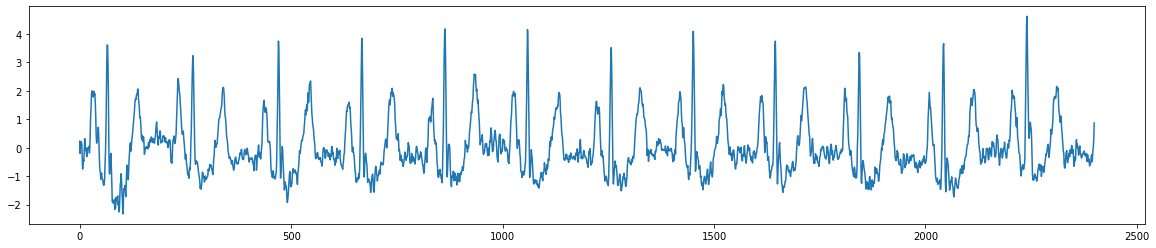

In [14]:
# 注意力热力图
import os
import numpy as np
import torch
from models import models_mae_1D_plot,models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
# import seaborn
device = 'cpu'
# model_1D = models_mae_1D.mae_vit_signal_patch12_mask75_mean()
model_1D = models_mae_1D_plot.mae_vit_signal_patch12_mask75()
model_1D.to(device)
state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m75_202208181236_v2_pl48_lr0.001_24_bsz256_datastand_True_random0.5_fs240Hz/best_w.pth',map_location='cpu')
# state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m75_mean_202208271023_v2_lr0.001_bsz256_datastand_True_fs240Hz/best_w.pth',map_location='cpu')
model_1D.load_state_dict(state['state_dict'])
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
np.save('1657599_240.xml.npy',a)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
a = torch.unsqueeze(a,dim=0)
# with torch.no_grad():
#     loss, y, mask = model_1D(a, mask_ratio=0.75)
# np.save('plot/attns/mask.npy',mask.numpy())
# attn_dir = 'plot/attns'
# attn8 = np.load(os.path.join(attn_dir,'attn7.npy'))
plt.figure(figsize=(20,4))
plt.plot(a[0][0])

/root/miniconda3/envs/ECG/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


input signal :torch.Size([1, 1, 2400])
output signal :torch.Size([1, 1, 2400])


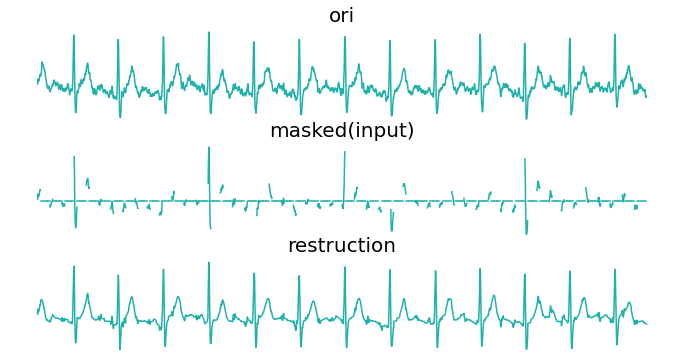

In [23]:
# 重构效果图

import os
import numpy as np
import torch
from models import models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
def show_image(signal, title=''):
    # image is [H, W, 3]
    signal = signal.detach().numpy()
    plt.plot(signal[0],color='lightseagreen')
    plt.title(title, fontsize=20)
    plt.axis('off')
    return
def run_one_signal(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    print('input signal :{}'.format(x.shape))
    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    print('output signal :{}'.format(y.shape))
    # visualize the mask
    mask = mask.detach()
    
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_length)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping

    # masked image
    im_masked = x * (1 - mask)
    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.subplot(3, 1, 1)
    show_image(x[0],'ori')
    plt.subplot(3, 1, 2)
    signal = im_masked[0].detach().numpy()
    signal = signal[0]
    for i in range(200):
        x_axios = range(i*12,i*12+12)
        plt.plot(x_axios,signal[x_axios],color='lightseagreen')
    plt.title('masked(input)',fontsize=20)
    plt.axis('off')
    plt.subplot(3, 1, 3)
    show_image(im_paste[0],'restruction')
device = 'cpu'
model_1D = models_mae_1D.mae_vit_signal_patch12_mask75_mean()
model_1D.to(device)
# state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m75_202208181236_v2_pl48_lr0.001_24_bsz256_datastand_True_random0.5_fs240Hz/best_w.pth',map_location='cpu')
# state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_m50_202208190501_v2_pl48_lr0.001_24_bsz256_datastand_True_random0.5_fs240Hz/best_w.pth',map_location='cpu')
state = torch.load(config.pre_train_ckpt,map_location='cpu')
model_1D.load_state_dict(state['state_dict'])
file_name = '1673427.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
with torch.no_grad():
    run_one_signal(a,model_1D)
plt.savefig('restruction_mean75_2.pdf', dpi=600, format='pdf')

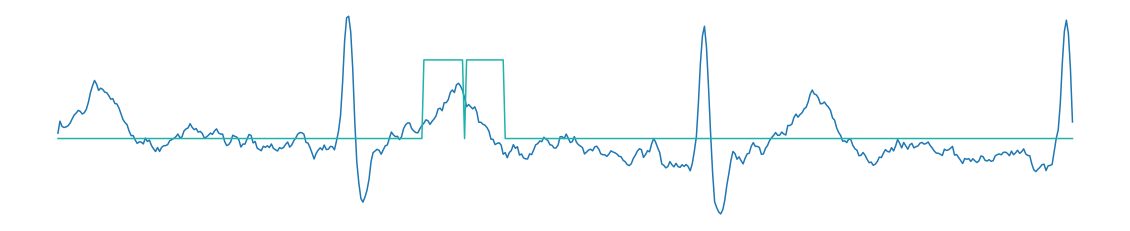

In [21]:
# diceloss吹牛逼
import os
import numpy as np
from config import config
import matplotlib.pyplot as plt
import data_process
file_name = '1673427.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = a[:500]
plt.figure(figsize=(20,4))
plt.plot(a)
buzu = np.zeros(500)
guodu = np.zeros(500)
zhenghao = np.zeros(500)
for i in range(193,203):
    buzu[i]=2
for i in range(160,240):
    guodu[i]=1
for i in range(180,220):
    zhenghao[i]=3
zhenghao[200] = 0
plt.plot(zhenghao,color = 'lightseagreen')
plt.axis('off')
plt.savefig('result_process.pdf', dpi=600, format='pdf')

In [8]:
# 天池、ccdd画图
import matplotlib.pyplot as plt
import os
import numpy as np
from config import config
from data_process import file2list
import matplotlib
matplotlib.use('Agg')
data_dir = config.segment_data_dir
tianchi_file = 'data/seg_tianchi_train.txt'
ccdd_file = 'data/seg_ccdd_train.txt'
tc_list = file2list(tianchi_file)
ccdd_list = file2list(ccdd_file)
tc_outdir = 'D://Data/U-net数据/plot/tc/'
ccdd_outdir = 'D://Data/U-net数据/plot/ccdd/'
for name in ccdd_list:
    data = np.load(os.path.join(data_dir,name))[0]
    plt.figure(figsize=(20,4))
    plt.plot(data)
    plt.axis('off')
    # save_name = name.split('.')[0]+'.pdf'
    save_name = name.split('.')[0]+'.png'

    save_path = os.path.join(ccdd_outdir,save_name)
    plt.savefig(save_path)
    plt.clf()
    plt.close()
    # plt.savefig(save_path, dpi=600, format='pdf')
    

In [1]:
# 分割效果图
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from models.ECG_mae_segmentation import EncoderMAE,ECG_mae_segmentation_U_12
from config import config
from data_process import output_sliding_voting

import torch.nn.functional as F

device = 'cpu'
pre_train_model = EncoderMAE()
pre_train_model = pre_train_model.to(device)
pre_train_model.eval()
model = ECG_mae_segmentation_U_12(pre_train_model=pre_train_model,class_n=4)
model.eval()
model = model.to(device)
   
state  = torch.load(os.path.join('ckpt/mae_vit_signal_patch12_m25_UTrans_12_202208220551_v2_tianchilr0.001_ReduceLROnPlateau_bsz64_datastand_True_freeze_True_240Hz_dice_loss','best_w.pth'),map_location='cpu')
model.load_state_dict(state['state_dict'])

data_dir = config.segment_data_dir
data_name = 'tianchi1300.npy'
data = np.load(os.path.join(data_dir,data_name))
x = data[0]
p_true = output_sliding_voting(data[1],window = 9)
r_true = output_sliding_voting(data[2],window = 9)
t_true = output_sliding_voting(data[3],window = 9)
x = (x - np.mean(x))/np.std(x)
x_plot = x
lenx = len(x)
x = torch.tensor(x,dtype = torch.float32)
x = torch.unsqueeze(x,0)
x = torch.unsqueeze(x,0)
with torch.no_grad():
    pred = model(x)
out_pred = F.softmax(pred, 1).detach().cpu().numpy().argmax(axis=1)
out_pred = np.reshape(out_pred,lenx)

output = output_sliding_voting(out_pred,9)
pred = np.zeros((4,lenx),dtype = np.float32)
for idx,i in enumerate(output):
    pred[int(i),idx] =1

plt.figure(figsize=(20,4))
plt.plot(x_plot)
plt.plot(pred[1]*100)


freeze


FileNotFoundError: [Errno 2] No such file or directory: 'ckpt\\mae_vit_signal_patch12_m75_UTrans_12_202208191228_v2_ccddlr0.001_ReduceLROnPlateau_bsz64_datastand_True_freeze_True_240Hz_dice_loss/best_w.pth'

In [45]:
# 统计ccdd标签
import os
from data_process import file2list,name2index,file2index
tianchi_file = 'data/seg_tianchi_train.txt'
ccdd_file = 'data/seg_ccdd_train.txt'

ccdd_list = file2list(ccdd_file)
tianchi_list = file2list(tianchi_file)

tianchi_label = 'D://Data/天池/TC_classifier/all_label_v1_ori.txt'
ccdd_label = 'D://Data/CCDD/ccdd_labels.txt'
tianchi_label_file = open(tianchi_label,encoding='utf-8')
tianchi_label_dict = dict()
tianchi_label_cnt = dict()
ccdd_label_file = open(ccdd_label,encoding='utf-8')
ccdd_label_dict = dict()
ccdd_label_cnt = dict()
print(len(ccdd_list))
# for list in tianchi_label_file.readlines():
#     list = list.strip().split(',')
#     id = list[0]
#     label = list[1:]
#     tianchi_label_dict[id]=label
for list in ccdd_label_file.readlines():
    list = list.strip().split(',')
    id = list[0]
    label = list[1:]
    ccdd_label_dict[id]=label
for name in ccdd_list:
    
    id = name.split('.')[0][4:]
   
  
    label = ccdd_label_dict[id]
    for l in label:
        if l in ccdd_label_cnt.keys():
            ccdd_label_cnt[l]+=1
        else:
            ccdd_label_cnt[l]=1
with open('D://Data/U-net数据/240Hz/ccdd_label_cnt.csv','w',encoding='utf-8') as fout:
    for arr,cnt in ccdd_label_cnt.items():
        fout.write(arr)
        fout.write(',')
        fout.write(str(cnt))
        fout.write('\n')

# name2idx = name2index('D://Data/天池/data/arrythmia.txt')

702


In [44]:
# 统计天池标签
import os
from data_process import file2list,name2index,file2index
tianchi_file = 'data/seg_tianchi_train.txt'
ccdd_file = 'data/seg_ccdd_train.txt'

ccdd_list = file2list(ccdd_file)
tianchi_list = file2list(tianchi_file)

tianchi_label = 'D://Data/天池/TC_classifier/all_label_v1_ori.txt'
ccdd_label = 'D://Data/CCDD/ccdd_labels.txt'
tianchi_label_file = open(tianchi_label,encoding='utf-8')
tianchi_label_dict = dict()
tianchi_label_cnt = dict()
ccdd_label_file = open(ccdd_label,encoding='utf-8')
ccdd_label_dict = dict()
ccdd_label_cnt = dict()
print(len(tianchi_list))
for list in tianchi_label_file.readlines():
    list = list.strip().split(',')
    id = list[0]
    label = list[1:]
    tianchi_label_dict[id]=label

for name in tianchi_list:
    
    id = name.split('.')[0][7:]
   
  
    label = tianchi_label_dict[id]
    # print("id:{},label:{}".format(id,label))
   
    for l in label:
        if l =='49':
            print(id)
        if l in tianchi_label_cnt.keys():
            tianchi_label_cnt[l]+=1
        else:
            tianchi_label_cnt[l]=1

with open('D://Data/U-net数据/240Hz/tianchi_label_cnt.csv','w',encoding='utf-8') as fout:
    for arr,cnt in tianchi_label_cnt.items():
        fout.write(arr)
        fout.write(',')
        fout.write(str(cnt))
        fout.write('\n')

# name2idx = name2index('D://Data/天池/data/arrythmia.txt')

800


In [41]:
# 天池标签

import os
from re import L
from data_process import file2index,name2index
import numpy as np
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
out_dir = 'D:\Data\天池\TC_classifier'

with open(os.path.join(out_dir,'all_label_v1_ori.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        if list[0]=='12657':
            print(arrhythmia_list)
        label_out.write(list[0].split('.')[0])
        for arr in arrhythmia_list:
            label_out.write(',')
            label_out.write(arr)
        label_out.write('\n')
        